#  <font color = darkblue size =6.5><center> NLP Project 
____
   

#  <font color = darkblue size =5> Problem Statement

In [ ]:
Topic Identification : Topic Identification or Topic Modelling is used to organize large chunk of data. To get summary and 
    identification of pattern in given text.
    topic modeling is unsupervised: you just supply it with a pile of documents and it churns out a list of topics 
    (word lists) and an attribution of every document to its topics.

#  <font color = darkblue size =5> Data Gathering 

In [ ]:
Structured Or Unstructured Format 
# how to convert json to csv 
# image to text 
# pdf to text 
# api 
# webscrapping 
# downlload 
# json 
# how to convert unstructured to structured format

#  <font color = darkblue size =5> EDA Specific to NLP 

In [ ]:
# why EDA ??
# What are conclusions from EDA ?? 

ML = Univariate analysis,bivariate analysis,multi

paiplot,boxplot,violinplot,piechart,countplot,barplot


conclusion 
example : 
    

    

In [ ]:
# EDA on columns other than text data

In [43]:
# Level 1 Data Preprocessing
from collections import Counter 
from nltk.tokenize import word_tokenize,sent_tokenize
import nltk
import gensim 
import pandas as pd
import wikipedia
import re
import string

In [44]:
wikisearch = wikipedia.page("Covid")
covid = wikisearch.content


In [45]:
covid

'Corvidae is a cosmopolitan family of oscine passerine birds that contains the crows, ravens, rooks, jackdaws, jays, magpies, treepies, choughs, and nutcrackers. In common English, they are known as the crow family, or, more technically, corvids. Currently 133 species are included in this family. The genus Corvus, including the jackdaws, crows, rooks, and ravens, makes up over a third of the entire family. Corvids are the largest passerines.\nCorvids display remarkable intelligence for animals of their size and are among the most intelligent birds thus far studied. Specifically, members of the family have demonstrated self-awareness in mirror tests (European magpies) and tool-making ability (e.g., crows and rooks), skills which until recently were thought to be possessed only by humans and a few other higher mammals. Their total brain-to-body mass ratio is equal to that of non-human great apes and cetaceans, and only slightly lower than that of humans.They are medium to large in size, 

In [46]:
wikisearch = wikipedia.page("Data Science")
Data_Science = wikisearch.content

In [47]:
Data_Science

'Data science is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from noisy, structured and unstructured data, and apply knowledge and actionable insights from data across a broad range of application domains. Data science is related to data mining, machine learning and big data.\nData science is a "concept to unify statistics, data analysis, informatics, and their related methods" in order to "understand and analyze actual phenomena" with data. It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge. However, data science is different from computer science and information science. Turing Award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational, and now data-driven) and asserted that "everything about science is changing because of the impact of i

In [6]:
corpus = [Data_Science,covid]

In [7]:
corpus

['Data science is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from noisy, structured and unstructured data, and apply knowledge and actionable insights from data across a broad range of application domains. Data science is related to data mining, machine learning and big data.\nData science is a "concept to unify statistics, data analysis, informatics, and their related methods" in order to "understand and analyze actual phenomena" with data. It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge. However, data science is different from computer science and information science. Turing Award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational, and now data-driven) and asserted that "everything about science is changing because of the impact of 

In [48]:
def preprocess(text):
    data = word_tokenize(text)
    #remove single charcter 
    # Remove punctuations 
    data2 = [ x for x in data if x.isalpha()]
    data3 = [ x.lower() for x in data2 if x.isalpha()]
    from nltk.corpus import stopwords
    stoward_list =stopwords.words('english')
    stoward_list
    data4 = [x for x in data3 if x not in stoward_list]
    from nltk.stem import LancasterStemmer,WordNetLemmatizer
    wnl = WordNetLemmatizer()
    data = [wnl.lemmatize(i) for i  in data4]
    return data


In [49]:
preprocessed_text = []
for doc in corpus:
    tokens = preprocess(doc)
    preprocessed_text.append(tokens)

In [50]:
len(preprocessed_text)

2

In [58]:
preprocessed_text[0]

['data',
 'science',
 'interdisciplinary',
 'field',
 'us',
 'scientific',
 'method',
 'process',
 'algorithm',
 'system',
 'extract',
 'knowledge',
 'insight',
 'noisy',
 'structured',
 'unstructured',
 'data',
 'apply',
 'knowledge',
 'actionable',
 'insight',
 'data',
 'across',
 'broad',
 'range',
 'application',
 'domain',
 'data',
 'science',
 'related',
 'data',
 'mining',
 'machine',
 'learning',
 'big',
 'data',
 'data',
 'science',
 'concept',
 'unify',
 'statistic',
 'data',
 'analysis',
 'informatics',
 'related',
 'method',
 'order',
 'understand',
 'analyze',
 'actual',
 'phenomenon',
 'data',
 'us',
 'technique',
 'theory',
 'drawn',
 'many',
 'field',
 'within',
 'context',
 'mathematics',
 'statistic',
 'computer',
 'science',
 'information',
 'science',
 'domain',
 'knowledge',
 'however',
 'data',
 'science',
 'different',
 'computer',
 'science',
 'information',
 'science',
 'turing',
 'award',
 'winner',
 'jim',
 'gray',
 'imagined',
 'data',
 'science',
 'fourth',

In [56]:
Counter(preprocessed_text[0]).most_common(10)

[('data', 70),
 ('science', 43),
 ('statistic', 19),
 ('used', 11),
 ('field', 8),
 ('knowledge', 7),
 ('technique', 6),
 ('information', 6),
 ('name', 6),
 ('learning', 5)]

In [53]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [54]:
# !pip install wordcloud
#conda install -c conda-forge wordcloud

from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

In [14]:
!pip install wordcloud
 

^C


In [15]:
def show_wordcloud(data):
    wordcloud= WordCloud(background_color='white',stopwords=stopwords,max_words=100,max_font_size=30,scale=3,random_state=1)
    wordcloud = wordcloud.generate(str(data))
    fig = plt.figure(1,figsize=(20,20))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

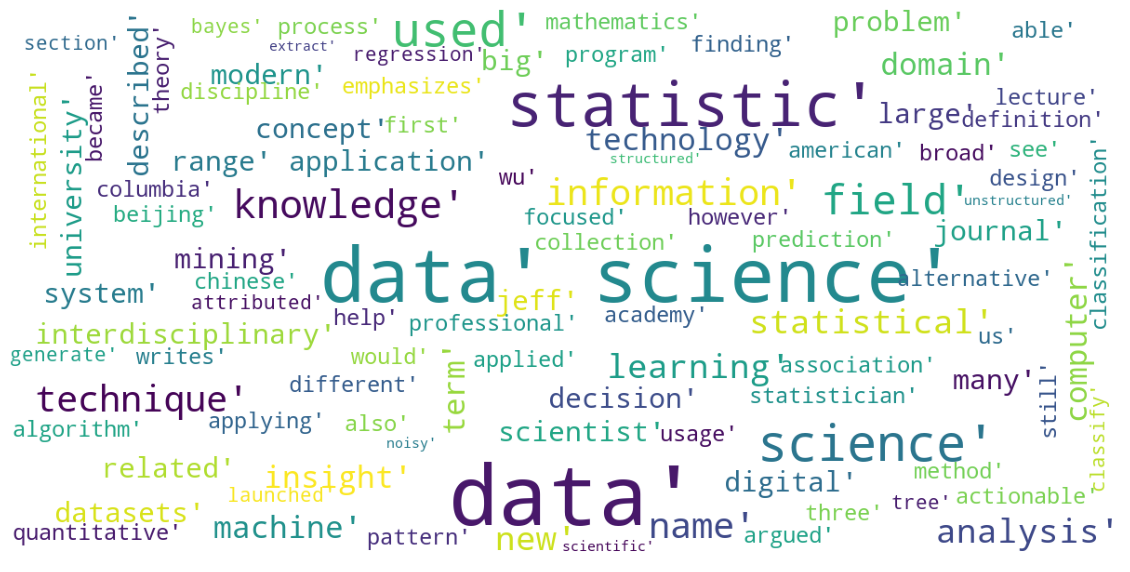

In [30]:

show_wordcloud(preprocessed_text[0])

In [17]:
# what is doc2bow ??
corpus

['Data science is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from noisy, structured and unstructured data, and apply knowledge and actionable insights from data across a broad range of application domains. Data science is related to data mining, machine learning and big data.\nData science is a "concept to unify statistics, data analysis, informatics, and their related methods" in order to "understand and analyze actual phenomena" with data. It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge. However, data science is different from computer science and information science. Turing Award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational, and now data-driven) and asserted that "everything about science is changing because of the impact of 

In [86]:
{i:processed_text[0].count(i) for i in processed_text[0]}

{'data': 70,
 'science': 43,
 'interdisciplinary': 3,
 'field': 8,
 'us': 2,
 'scientific': 1,
 'method': 2,
 'process': 2,
 'algorithm': 2,
 'system': 3,
 'extract': 1,
 'knowledge': 7,
 'insight': 4,
 'noisy': 1,
 'structured': 1,
 'unstructured': 1,
 'apply': 1,
 'actionable': 2,
 'across': 1,
 'broad': 2,
 'range': 3,
 'application': 4,
 'domain': 4,
 'related': 3,
 'mining': 3,
 'machine': 4,
 'learning': 5,
 'big': 3,
 'concept': 3,
 'unify': 1,
 'statistic': 19,
 'analysis': 5,
 'informatics': 1,
 'order': 1,
 'understand': 1,
 'analyze': 1,
 'actual': 1,
 'phenomenon': 1,
 'technique': 6,
 'theory': 2,
 'drawn': 1,
 'many': 3,
 'within': 1,
 'context': 1,
 'mathematics': 2,
 'computer': 4,
 'information': 6,
 'however': 2,
 'different': 2,
 'turing': 1,
 'award': 1,
 'winner': 1,
 'jim': 1,
 'gray': 1,
 'imagined': 1,
 'fourth': 1,
 'paradigm': 1,
 'empirical': 1,
 'theoretical': 1,
 'computational': 1,
 'asserted': 1,
 'everything': 1,
 'changing': 1,
 'impact': 1,
 'technolog

In [59]:
from gensim import corpora 
input_dict = corpora.Dictionary(preprocessed_text)

In [38]:
input_corpus = [input_dict.doc2bow(token,allow_update=True) for token in preprocessed_text]

In [39]:
input_corpus

[[(0, 2),
  (1, 2),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 2),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 2),
  (12, 2),
  (13, 2),
  (14, 2),
  (15, 1),
  (16, 5),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 4),
  (23, 2),
  (24, 1),
  (25, 2),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 2),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 2),
  (34, 1),
  (35, 1),
  (36, 2),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 2),
  (41, 2),
  (42, 2),
  (43, 1),
  (44, 1),
  (45, 3),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 2),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 2),
  (59, 2),
  (60, 1),
  (61, 2),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 2),
  (66, 2),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 4),
  (78, 1),
  (79, 3),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 70),
  (91, 1

In [40]:
id_words = [[(input_dict[id], count) for id, count in line] for line in input_corpus]
print(id_words)

[[('able', 2), ('academy', 2), ('accounting', 1), ('accurate', 1), ('acknowledged', 1), ('across', 1), ('action', 1), ('actionable', 2), ('actual', 1), ('advertise', 1), ('advocated', 1), ('algorithm', 2), ('also', 2), ('alternative', 2), ('american', 2), ('amount', 1), ('analysis', 5), ('analytics', 1), ('analyze', 1), ('analyzing', 1), ('andrew', 1), ('another', 1), ('application', 4), ('applied', 2), ('apply', 1), ('applying', 2), ('aptly', 1), ('area', 1), ('argue', 1), ('argued', 2), ('ascendant', 1), ('aspect', 1), ('asserted', 1), ('association', 2), ('attendee', 1), ('attribute', 1), ('attributed', 2), ('award', 1), ('back', 1), ('based', 1), ('bayes', 2), ('became', 2), ('beijing', 2), ('ben', 1), ('beyond', 1), ('big', 3), ('board', 1), ('branch', 1), ('breaking', 1), ('broad', 2), ('broadly', 1), ('business', 1), ('called', 1), ('century', 1), ('change', 1), ('changed', 1), ('changing', 1), ('chikio', 1), ('chinese', 2), ('classification', 2), ('classifier', 1), ('classify',

In [65]:
# lda model : Latent Dirichlet Allocation
lda_model = gensim.models.LdaMulticore(input_corpus, num_topics=2, id2word=input_dict, passes=2, workers=4)


In [66]:
for idx, topic in lda_model.print_topics(-2):
    print('Topic: {} Word: {}'.format(idx, topic))
    print()

Topic: 0 Word: 0.035*"data" + 0.022*"science" + 0.010*"statistic" + 0.006*"crow" + 0.006*"used" + 0.004*"jay" + 0.004*"corvus" + 0.004*"field" + 0.004*"corvids" + 0.004*"knowledge"

Topic: 1 Word: 0.021*"crow" + 0.016*"jay" + 0.015*"corvus" + 0.013*"raven" + 0.013*"corvids" + 0.009*"specie" + 0.008*"magpie" + 0.007*"genus" + 0.006*"bird" + 0.005*"human"



In [ ]:
test = 'Because of Covid number of people lost their jobs.'
text1 = preprocess(test)
text2 = input_dict.doc2bow(text1)
lda_model.get_document_topics(text2)